<a href="https://colab.research.google.com/github/sulimankhan587/IoT/blob/main/Copy_of_IoT_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

# **Read Data**

In [ ]:
datapath = "Iot dataset.csv"

In [ ]:
df=pd.read_csv(datapath,sep=",",encoding = 'latin')    #software level defect
#pd.pandas.set_option('display.max_columns',None)
#for i in df.columns:
  #if df.columns.

FileNotFoundError: ignored

In [ ]:
df.shape

In [ ]:
df

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.isnull().sum()

In [ ]:
df['heart_rate']=df['heart_rate'].fillna(df['heart_rate'].mean())

In [ ]:
for i in df.columns:
    if df[i].isnull().sum()>1:
        df[i]=df[i].fillna(df[i].mean())
df.dropna(how='any',axis=0,inplace=True)
#df.drop(['ID'],axis=1,inplace=True)
#df.drop(['group'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
df.groupby('outcome').mean().reset_index()

In [ ]:
numerical_features = [features for features in df.columns if len(df[features].unique())>5]
categorical_features = [features for features in df.columns if features not in numerical_features]
categorical_features

In [ ]:
## Using pearson Correlation

plt.figure(figsize=(15,10))
cor=df[categorical_features].corr()
sns.heatmap(cor , annot=True)
plt.show()

In [ ]:
df.corr()['outcome'].sort_values(ascending=False).head()

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
labels=['Live','Died']
plt.title('Pie chart', fontweight='bold', fontsize='14',fontfamily='sans-serif',color='red')
plt.pie(df['outcome'].value_counts(),labels=labels, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='black'),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)


countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='red')
ax = sns.countplot(x='outcome', data=df,
                   edgecolor='black', alpha=0.85)

In [ ]:
"""
df_outcome_0=data[data['outcome']==0]
df_outcome_1 = data[data['outcome']==1]

outcome_0 = df_outcome_0.sample(n=159)

new_data = pd.concat([df_outcome_1,outcome_0],axis=0)
"""

# Target variable
**1 - Alive**

**2 - Death**

# **Label Encoder**

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#df=df.apply(LabelEncoder().fit_transform)


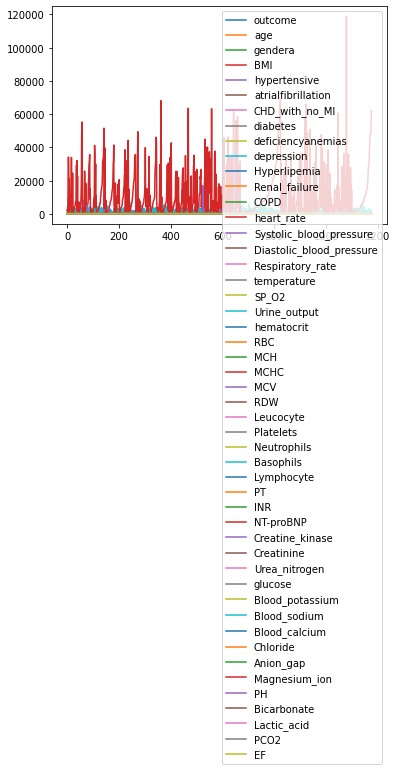

In [ ]:
df.plot()

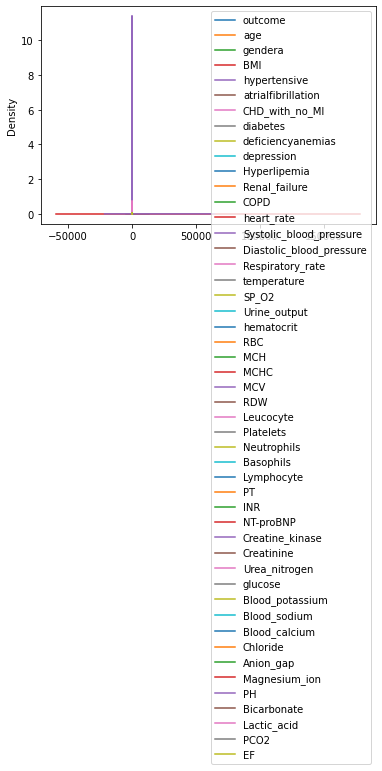

In [ ]:
df.plot(kind='density')

In [ ]:
X=df.iloc[:,1:]
X

,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,72,1,37.588179,0,0,0,1,1,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55
1,75,2,30.188278,0,0,0,0,1,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
2,83,2,26.572634,0,0,0,0,1,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500000,71.500000,35
3,43,2,83.264629,0,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600000,75.000000,55
4,75,2,31.824842,1,0,0,0,1,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.600000,50.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,62,1,25.516870,1,1,0,1,0,1,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,7.378532,27.714286,1.853426,45.535382,40
1173,78,1,25.822710,0,1,0,1,0,1,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,7.378532,20.480000,1.853426,45.535382,30
1174,85,2,23.891779,1,1,0,1,1,0,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,7.378532,28.857143,1.853426,45.535382,55
1175,79,2,35.288554,0,0,1,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,7.378532,24.375000,1.853426,45.535382,25


In [ ]:
X.shape

(1175, 48)

In [ ]:
x1=X.iloc[:,1:5]
x1

,gendera,BMI,hypertensive,atrialfibrillation
0,1,37.588179,0,0
1,2,30.188278,0,0
2,2,26.572634,0,0
3,2,83.264629,0,0
4,2,31.824842,1,0
...,...,...,...,...
1172,1,25.516870,1,1
1173,1,25.822710,0,1
1174,2,23.891779,1,1
1175,2,35.288554,0,0


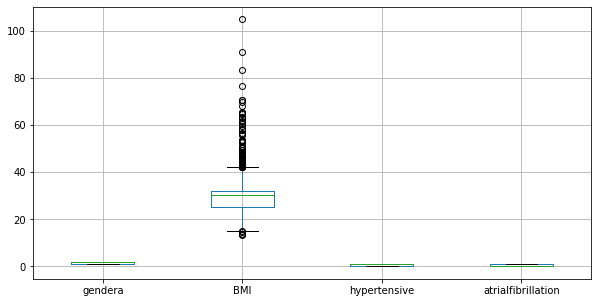

In [ ]:
x1 = pd.DataFrame(x1)
x1.boxplot(figsize=(10, 5));

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,0:1]
y.shape





(1175, 1)

In [ ]:
y.head() #1 as true and 0 as false

,outcome
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)





# **Split data in Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='linear') #Default hyperparameters
model=svc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))




Accuracy Score:
0.8723404255319149


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       202
         1.0       0.67      0.18      0.29        33

    accuracy                           0.87       235
   macro avg       0.77      0.58      0.61       235
weighted avg       0.85      0.87      0.84       235



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
type(X_test)

numpy.ndarray

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


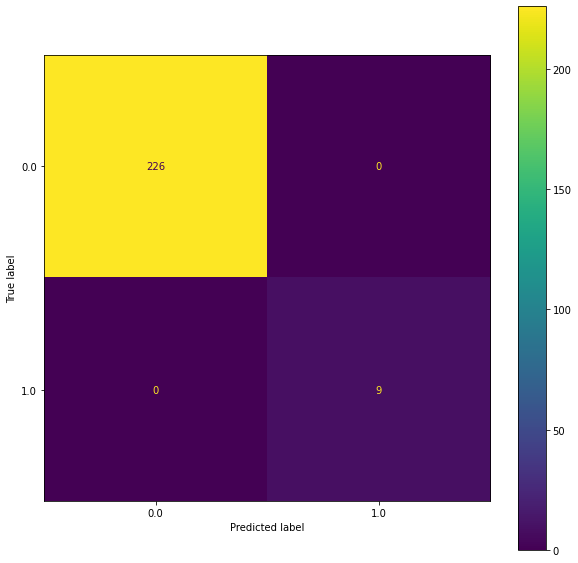

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,X_test, y_pred,ax=ax)

In [ ]:
confusion_matrix= confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[199   3]
 [ 27   6]]


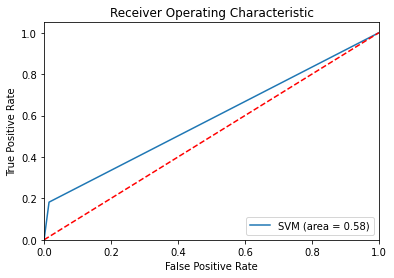

In [ ]:

logit_roc_auc= roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Food supply chain**

In [ ]:
import pandas as pd,random
Food_quantity=[]
Room=[]
condition=[]

for i in range(336):
  Food_quantity.append(random.randint(0,1000))
  condition.append(random.choice([0,1]))
  Room.append(i+1)
df= pd.read_csv("Food dataset.csv")
df

,Date,Time,Temperature,Humidity,FoodQt,Room,condition
0,3/14/2019,19:33:07,T=22.0,H=20.0,771,1,0
1,3/14/2019,19:38:10,T=22.0,H=20.0,172,2,0
2,3/14/2019,19:43:11,T=22.0,H=26.0,950,3,1
3,3/14/2019,19:48:14,T=22.0,H=26.0,107,4,0
4,3/14/2019,19:53:15,T=22.0,H=20.0,993,5,1
...,...,...,...,...,...,...,...
331,3/15/2019,23:48:51,T=18.0,H=28.0,103,332,1
332,3/15/2019,23:53:51,T=18.0,H=22.0,476,333,1
333,3/15/2019,23:58:52,T=18.0,H=22.0,624,334,0
334,3/16/2019,0:03:52,T=18.0,H=22.0,318,335,0


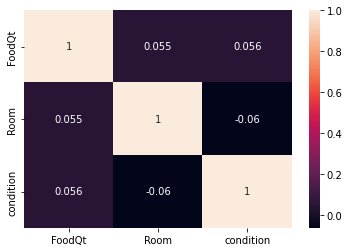

In [ ]:
## Using pearson Correlation
import matplotlib as plt
cor=df.corr()
sns.heatmap(cor , annot=True)


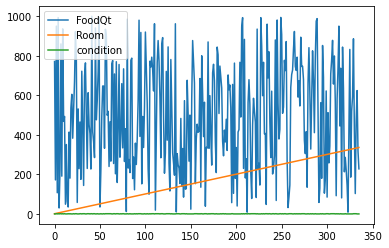

In [ ]:
df.plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)


In [ ]:
X=df.iloc[:,2:-2]
X

,Temperature,Humidity,FoodQt
0,7,9,228
1,7,9,39
2,7,15,270
3,7,15,25
4,7,9,278
...,...,...,...
331,3,17,22
332,3,11,132
333,3,11,177
334,3,11,84


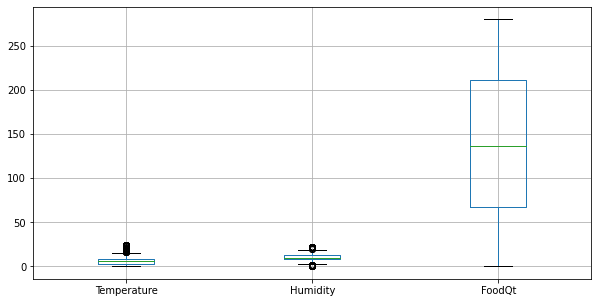

In [ ]:
x1 = pd.DataFrame(X)
x1.boxplot(figsize=(10, 5));

In [ ]:

from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1:]
y


,condition
0,0
1,0
2,1
3,0
4,1
...,...
331,1
332,1
333,0
334,0


In [ ]:
y.shape

(336, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:

from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='linear') #Default hyperparameters
model=svc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score:
0.5588235294117647


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.87      0.69        38
           1       0.50      0.17      0.25        30

    accuracy                           0.56        68
   macro avg       0.53      0.52      0.47        68
weighted avg       0.54      0.56      0.49        68

